In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from preprocessor import main

font_path = '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc'
fontprop = fm.FontProperties(fname = font_path, size = 10)

train = pd.read_csv('EV_Cost_data/train.csv')

In [3]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [5]:
# Run the preprocessor
train_pre = main(train)

train_pre.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),연간_주행거리,가격구간,제조사_카테고리
0,0,4,16,1,86.07700,0,13642,0,0,2,159.66,4547.333333,0,3
1,1,3,10,1,56.00000,1,10199,6,0,0,28.01,10199.000000,2,1
2,2,0,17,0,91.20000,0,2361,7,0,0,66.27,2361.000000,2,0
3,3,0,12,1,78.36257,0,21683,3,0,0,99.16,21683.000000,0,0
4,4,1,19,2,61.01800,0,178205,1,0,0,62.02,178205.000000,2,2


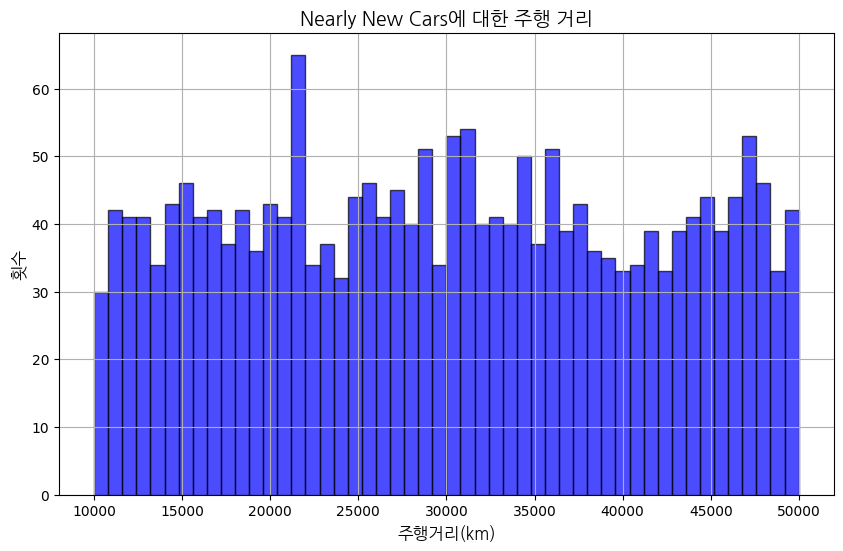

In [7]:
nearly_new_df = train[train["차량상태"] == "Nearly New"]

# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(nearly_new_df["주행거리(km)"], bins=50, color="blue", edgecolor="k", alpha=0.7)
plt.title("Nearly New Cars에 대한 주행 거리", fontproperties=fontprop, fontsize=14)
plt.xlabel("주행거리(km)", fontproperties=fontprop, fontsize=12)
plt.ylabel("횟수", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()

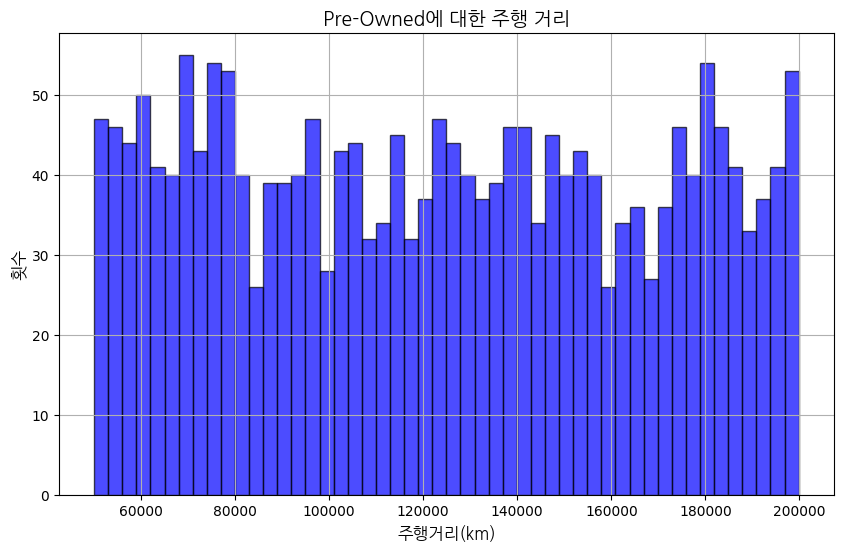

In [8]:
nearly_new_df = train[train["차량상태"] == "Pre-Owned"]

# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(nearly_new_df["주행거리(km)"], bins=50, color="blue", edgecolor="k", alpha=0.7)
plt.title("Pre-Owned에 대한 주행 거리", fontproperties=fontprop, fontsize=14)
plt.xlabel("주행거리(km)", fontproperties=fontprop, fontsize=12)
plt.ylabel("횟수", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()

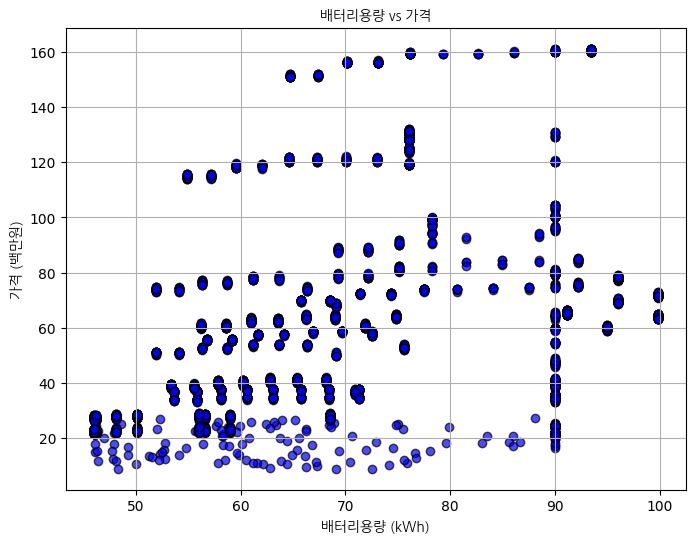

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(train['배터리용량'], train['가격(백만원)'], color='blue', edgecolor='k', alpha=0.7)
plt.title('배터리용량 vs 가격', fontproperties = fontprop)
plt.xlabel('배터리용량 (kWh)', fontproperties = fontprop)
plt.ylabel('가격 (백만원)', fontproperties = fontprop)
plt.grid(True)
plt.show()

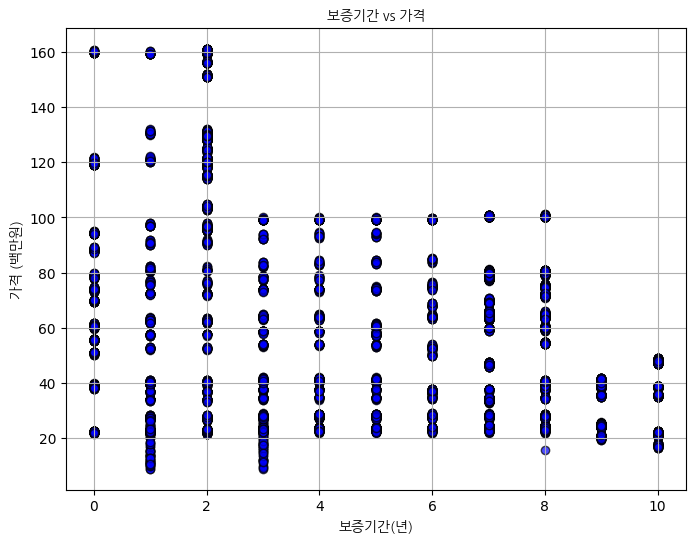

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(train['보증기간(년)'], train['가격(백만원)'], color='blue', edgecolor='k', alpha=0.7)
plt.title('보증기간 vs 가격', fontproperties = fontprop)
plt.xlabel('보증기간(년)', fontproperties = fontprop)
plt.ylabel('가격 (백만원)', fontproperties = fontprop)
plt.grid(True)
plt.show()

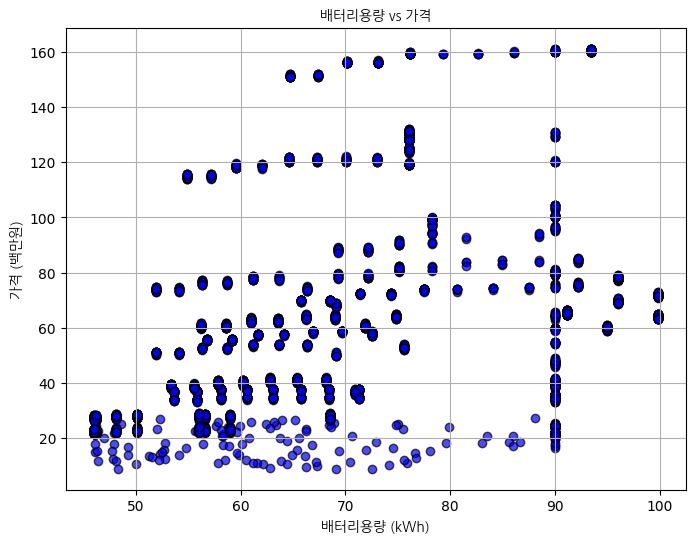

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train['배터리용량'], train['가격(백만원)'], color='blue', edgecolor='k', alpha=0.7)
plt.title('배터리용량 vs 가격', fontproperties = fontprop)
plt.xlabel('배터리용량 (kWh)', fontproperties = fontprop)
plt.ylabel('가격 (백만원)', fontproperties = fontprop)
plt.grid(True)
plt.show()

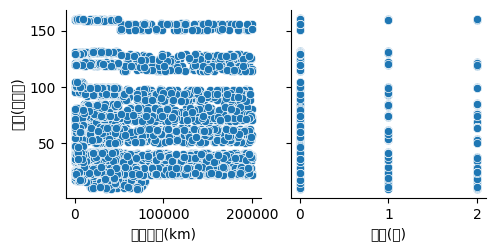

In [12]:
sns.pairplot(train, x_vars=['주행거리(km)', '연식(년)'], y_vars='가격(백만원)', kind='scatter')
plt.show()

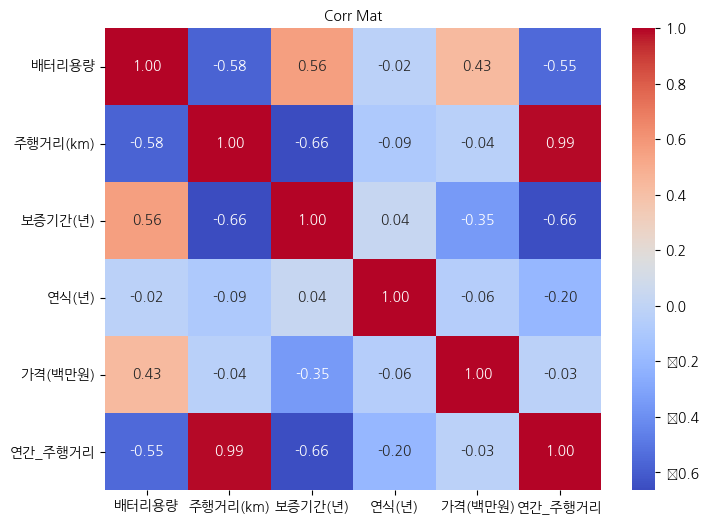

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

rc('font', family=fontprop.get_name())  # matplotlib에 적용

# Numeric 데이터 선택
numeric_df = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# 상관 관계 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Corr Mat', fontsize=10)
plt.show()

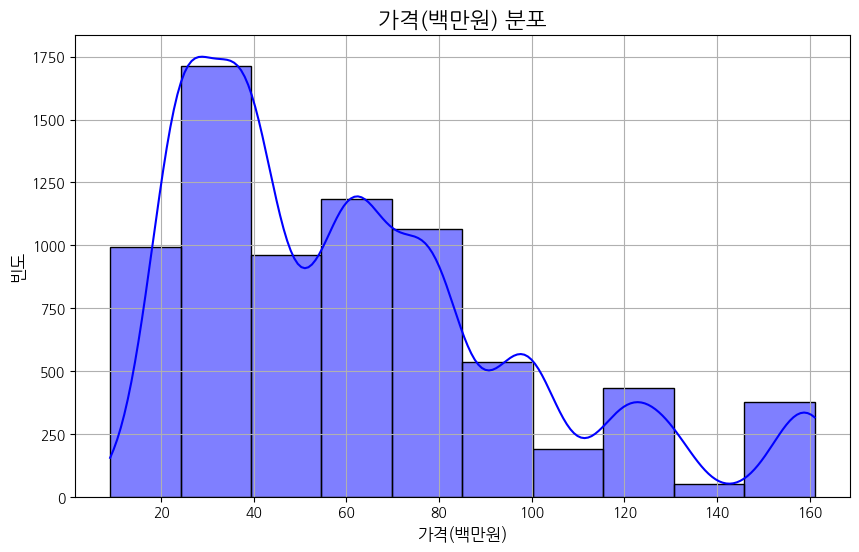

In [14]:
# 히스토그램과 KDE
plt.figure(figsize=(10, 6))
sns.histplot(train["가격(백만원)"], kde=True, color="blue", bins=10, edgecolor="k")
plt.title("가격(백만원) 분포", fontproperties=fontprop, fontsize=16)
plt.xlabel("가격(백만원)", fontproperties=fontprop, fontsize=12)
plt.ylabel("빈도", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()

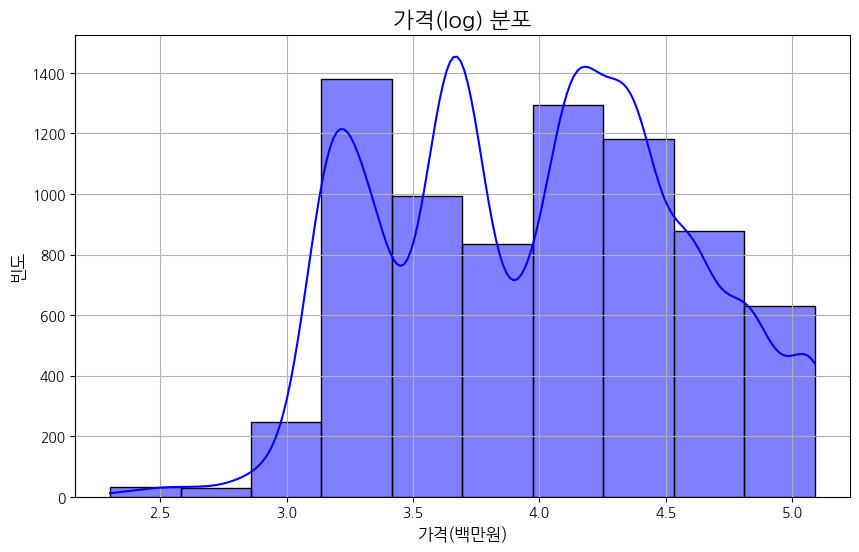

In [15]:
train["가격(백만원)_log"] = np.log1p(train["가격(백만원)"])


# 히스토그램과 KDE
plt.figure(figsize=(10, 6))
sns.histplot(train["가격(백만원)_log"], kde=True, color="blue", bins=10, edgecolor="k")
plt.title("가격(log) 분포", fontproperties=fontprop, fontsize=16)
plt.xlabel("가격(백만원)", fontproperties=fontprop, fontsize=12)
plt.ylabel("빈도", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()

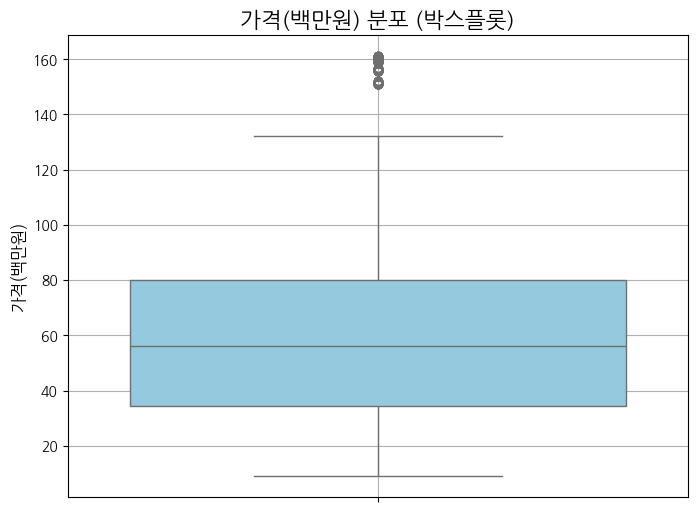

In [16]:
# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y=train["가격(백만원)"], color="skyblue")
plt.title("가격(백만원) 분포 (박스플롯)", fontproperties=fontprop, fontsize=16)
plt.ylabel("가격(백만원)", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()

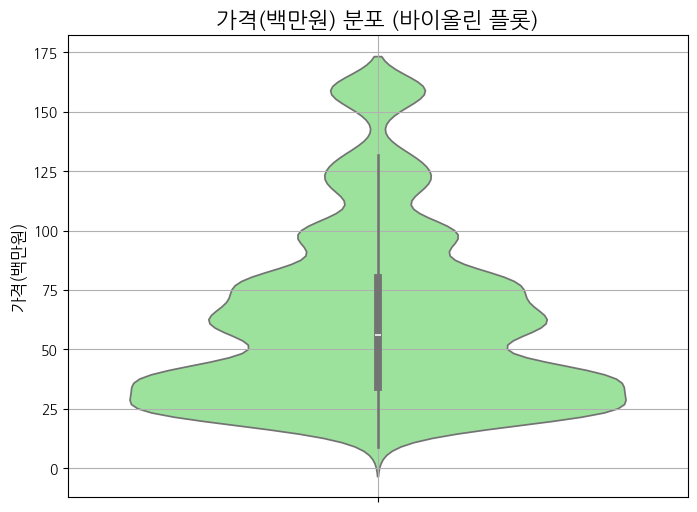

In [17]:
# 바이올린 플롯
plt.figure(figsize=(8, 6))
sns.violinplot(y=train["가격(백만원)"], color="lightgreen")
plt.title("가격(백만원) 분포 (바이올린 플롯)", fontproperties=fontprop, fontsize=16)
plt.ylabel("가격(백만원)", fontproperties=fontprop, fontsize=12)
plt.grid(True)
plt.show()